a) No. Training Samples - **8143**
   No. Test Samples -  **9752**

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
testdata = pd.read_csv('testData.txt', sep=',')
traindata = pd.read_csv('trainData.txt', sep=',')

testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [4]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [7]:
X = traindata.iloc[:5000, 1:6]
Y = testdata.iloc[:5000, -1:]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(4000, 5) (4000, 1) (1000, 5) (1000, 1)


In [3]:
model = tf.keras.Sequential()
model.add(Dense(16, activation='relu',input_shape=(5, ))) 
model.add(Dense(32, activation='softplus')) 
model.add(Dense(32, activation='softplus'))
model.add(Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [11]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [12]:
fitmodel = model.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 1.7641 - accuracy: 0.7368 - val_loss: 0.4753 - val_accuracy: 0.8033
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8118 - val_loss: 0.4954 - val_accuracy: 0.7575
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8154 - val_loss: 0.4549 - val_accuracy: 0.8017
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.8211 - val_loss: 0.4816 - val_accuracy: 0.7575
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8196 - val_loss: 0.5887 - val_accuracy: 0.8067


In [13]:
training_loss, training_acc = model.evaluate(train_x, train_y)
testing_loss, testing_acc = model.evaluate(test_x, test_y)

32/32 [==============================] - 0s 911us/step - loss: 0.5817 - accuracy: 0.8070


In [14]:
pred = model.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 2ms/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 3ms/step - loss: 0.3847 - accuracy: 0.8443 - val_loss: 0.3764 - val_accuracy: 0.8458
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8311 - val_loss: 0.3903 - val_accuracy: 0.8233
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8464 - val_loss: 0.3948 - val_accuracy: 0.8375
Epoch 4/5
88/88 [==============================] - 0s 5ms/step - loss: 0.3854 - accuracy: 0.8396 - val_loss: 0.3811 - val_accuracy: 0.8283
Epoch 5/5
88/88 [==============================] - 1s 6ms/step - loss: 0.4068 - accuracy: 0.8307 - val_loss: 0.4591 - val_accuracy: 0.8217


Text(0, 0.5, 'Accuracy')

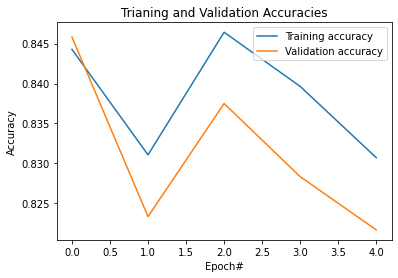

In [19]:
fitModel = model.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')




Text(0, 0.5, 'Loss')

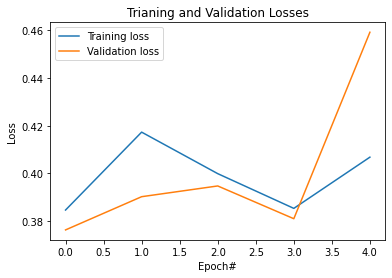

In [20]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')

c) This is a three layer model with accuracy 81%

In [18]:
test_predict = model.predict(test_x)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = test_y, predictions = test_predict_labels)
print('confusion Matrix\n', confusion_matrix)


32/32 [==============================] - 0s 872us/step
confusion Matrix
 tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


d) Adding one more hidden layer - 5 Input, Hidden Layer1, Hidden Layer2 and one output

In [4]:
model2 = tf.keras.Sequential()
model2.add(Dense(16, activation='relu',input_shape=(5, ))) 
model2.add(Dense(32, activation='softplus'))
model2.add(Dense(32, activation='softplus'))
model2.add(Dense(32, activation='softplus'))
model2.add(Dense(1, activation='sigmoid')) 

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                96        
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
_________________________________________________________________


In [36]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model2.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [37]:
fitmodel = model2.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 2.0191 - accuracy: 0.7336 - val_loss: 0.4693 - val_accuracy: 0.8067
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7946 - val_loss: 0.4611 - val_accuracy: 0.8100
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.8018 - val_loss: 0.5135 - val_accuracy: 0.8058
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7896 - val_loss: 0.5518 - val_accuracy: 0.8058
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7957 - val_loss: 0.4620 - val_accuracy: 0.8092


In [38]:
training_loss, training_acc = model2.evaluate(train_x, train_y)
testing_loss, testing_acc = model2.evaluate(test_x, test_y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8080


In [39]:
pred = model2.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 991us/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7986 - val_loss: 0.5392 - val_accuracy: 0.8033
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.7979 - val_loss: 0.4823 - val_accuracy: 0.7983
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.8057 - val_loss: 0.4345 - val_accuracy: 0.8042
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.8043 - val_loss: 0.4692 - val_accuracy: 0.7850
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.8107 - val_loss: 0.5720 - val_accuracy: 0.7342


Text(0, 0.5, 'Accuracy')

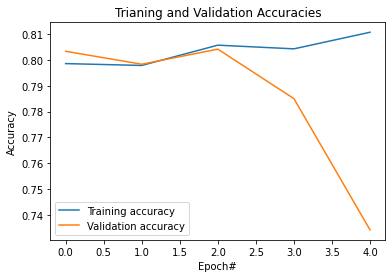

In [40]:
fitModel = model2.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

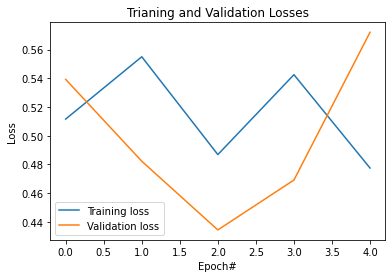

In [41]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')